In [50]:
import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv("Data/CCTV_Seoul.csv", encoding = "utf-8")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [51]:
cctv_seoul.columns
cctv_seoul.columns[0]
cctv_seoul.rename(columns = {cctv_seoul.columns[0]:'구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [73]:
pop_seoul = pd.read_excel("Data/population_Seoul.xls", encoding='utf-8'
                         , header = 2
                         , usecols = 'B,D,G,J,N'
                         )

print(pop_seoul.columns[0])
pop_seoul.rename(columns = {pop_seoul.columns[0] : '구별' 
                        ,pop_seoul.columns[1] : '인구'
                        ,pop_seoul.columns[2] : '한국인'
                        ,pop_seoul.columns[3] : '외국인'
                        ,pop_seoul.columns[4] : '고령자'
                           }, inplace = True )

pop_seoul.drop([0], inplace=True)
#pop_seoul.sort_index(axis = 0)
#pop_seoul.sort_values(by='고령자',ascending=False)
#pop_seoul.sort_values(by=['인구','고령자'],ascending=[False,True])


#pop_seoul.drop([26], inplace=True)

자치구


In [74]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + 
                       cctv_seoul['2014년'] ) / cctv_seoul['2013년도 이전'] * 100 
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [97]:
pop_seoul['구별'].unique()
pop_seoul['구별'].isnull()
pop_seoul[pop_seoul['구별'].isnull()]


1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [101]:
pop_seoul['외국인비율'] = pop_seoul['외국인']/ pop_seoul['인구'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자']/ pop_seoul['인구'] * 100


res = pd.merge(pop_seoul, cctv_seoul, on = ['구별'])
#보고싶은것만 보려면? select문에 대응하는 것,.

del res['2013년도 이전']
del res['2014년']
del res['2015년']
del res['2016년']
res

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,53.228621
5,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322,1294,74.766355
6,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,660,79.960707
7,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062,1464,63.627354
8,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,748,125.203252
9,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,485,246.638655


[0     5.669451
 1     6.700690
 2     6.038828
 3     2.526635
 4     4.017852
 5     4.172440
 6     1.114829
 7     2.490353
 8     1.061806
 9     0.578524
 10    0.670725
 11    0.899091
 12    3.723221
 13    2.844355
 14    0.839413
 15    1.080540
 16    7.007998
 17    7.342345
 18    8.663598
 19    2.924464
 20    3.484582
 21    0.958451
 22    0.867660
 23    1.033584
 24    0.929765
 Name: 외국인비율, dtype: float64, 0     248.922414
 1     147.699758
 2      53.216374
 3      81.780822
 4      53.228621
 5      74.766355
 6      79.960707
 7      63.627354
 8     125.203252
 9     246.638655
 10    188.929889
 11     85.237258
 12     48.578199
 13    212.101911
 14     34.671731
 15    134.793814
 16     64.973730
 17    100.000000
 18    157.979798
 19    139.338235
 20    149.290780
 21     63.371266
 22    150.619195
 23    104.347826
 24    166.490765
 Name: 최근증가율, dtype: float64]

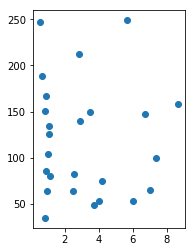

In [139]:
import matplotlib.pyplot as plt
plt.subplot(121)
y = res['최근증가율']
x = res['외국인비율']
plt.scatter(x,y)
#res.plot(kind='barh', grid = True, figsize=(10.10))